# Animated Spatial Maps

### Introduction
In this training, we plot animated maps varying with time using Python. Some of the material is taken from this [blog post](https://waterprogramming.wordpress.com/2016/03/01/making-movies-of-time-evolving-global-maps-with-python/)

Data Required : Multiple files are downloaded from this [data source](https://www.worldclim.org/data/worldclim21.html) for the historical data. The variable selected is precipitation for the month of August for years 2000-2021.      

This page covers the following elements 
1. Plotting raster files
2. Animated plots with grey scale
3. Colored maps with legend and text 

#### Plotting Raster File 

(-0.5, 2159.5, 1079.5, -0.5)

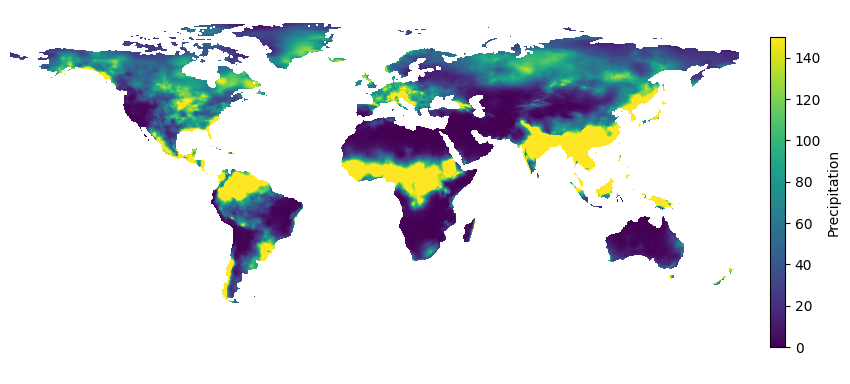

In [ ]:
#plotting single raster file
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff          # pip install tifffile

# Load the image 
path = "SupportingFiles/wc2.1_10m_prec_2002-08.tif"
img = tiff.imread(path)          
# plot the image
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(img, cmap="viridis", vmin=0, vmax=150)
cbar = fig.colorbar(im, ax=ax, fraction=0.02, pad=0.04)  # tweak size/spacing
cbar.set_label("Precipitation")                            # colorbar axis label  
plt.axis('off')

#### Plotting Animated Maps 

In [ ]:
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt 

# Get all tif files in the current directory #different files could also be called as list of names
image_files = sorted(glob.glob("SupportingFiles/*.tif")) 
#sorted() ensures frames are in the correct order.

# Open all the images
images = [Image.open(img) for img in image_files]

# Save as an animated GIF
images[0].save(
    "globe_Cost_Reduction_faster.gif",
    save_all=True,
    append_images=images[1:],
    duration=45 * 10,  # Convert delay from ImageMagick (1/100 sec) to milliseconds
    loop=0
)


duration=450 → because ImageMagick's -delay 45 means 45/100 seconds per frame.

loop=0 → means infinite loop.

![](globe_Cost_Reduction_faster.gif)

#### Plotting Animated Maps with colorbar and text

In [ ]:

import glob, io, tifffile as tiff, numpy as np, imageio.v3 as iio
import matplotlib.pyplot as plt
import os
frames = []
for tif in sorted(glob.glob("SupportingFiles/wc2.1_10m_prec_2*.tif")): #reading the selected files with name starting with
    data = tiff.imread(tif)
    
    fig, ax = plt.subplots(figsize=(10,10))
    # p2,p98 = np.nanpercentile(data,(2,98))
    im = ax.imshow(data, cmap="viridis", vmin=0, vmax=150) #vmin and vmax could be defined based on the percentile values or desired range
    ax.axis("off")
    cbar = fig.colorbar(im, ax=ax, fraction=0.02, pad=0.04)  # tweak size/spacing
    cbar.set_label("Precipitation")                            # axis label
    ax.set_title(os.path.basename(tif)[-11:-7], fontsize=14)   # title line
    # capture PNG bytes from the figure
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=120, bbox_inches="tight", pad_inches=0)
    plt.close(fig)
    buf.seek(0)
    
    frames.append(iio.imread(buf))           # convert PNG to ndarray

# save GIF 
iio.imwrite("stack.gif", frames, fps=2, loop=0) #fps is frames per second
print("stack.gif created with", len(frames), "frames")


stack.gif created with 22 frames


![](stack.gif?v=20250519)